/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


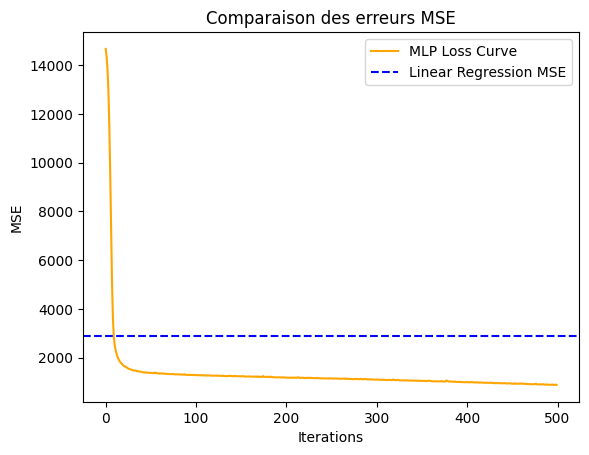

Régression Linéaire - MSE: 2900.1936
MLP Regression - MSE: 878.4381
Meilleure méthode: MLP Regression


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

# Chargement et préparation des données
X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisation
scaler = StandardScaler()
X_train, X_test = scaler.fit_transform(X_train), scaler.transform(X_test)

# Régression linéaire
lr = LinearRegression().fit(X_train, y_train)
mse_lr = mean_squared_error(y_test, lr.predict(X_test))

# MLP Regression
mlp = MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=500, batch_size=16, random_state=42).fit(X_train, y_train)
mse_mlp = min(mlp.loss_curve_)

# Affichage des résultats
plt.plot(mlp.loss_curve_, label='MLP Loss Curve', color='orange')
plt.axhline(y=mse_lr, color='blue', linestyle='--', label='Linear Regression MSE')
plt.xlabel("Iterations"), plt.ylabel("MSE"), plt.title("Comparaison des erreurs MSE"), plt.legend()
plt.show()

print(f"Régression Linéaire - MSE: {mse_lr:.4f}")
print(f"MLP Regression - MSE: {mse_mlp:.4f}")
print(f"Meilleure méthode: {'Régression Linéaire' if mse_lr < mse_mlp else 'MLP Regression'}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
MSE: 2763.9924


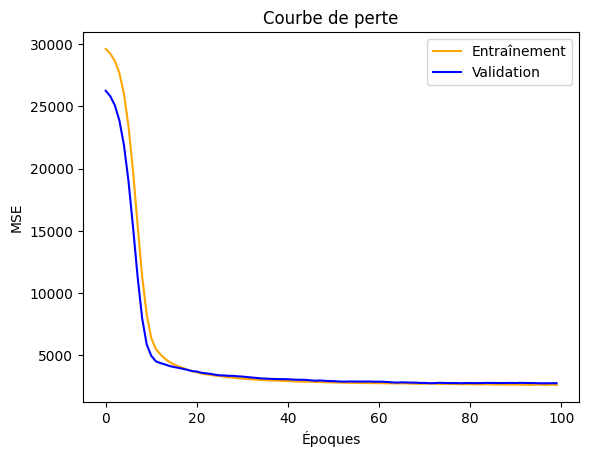

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Chargement et prétraitement des données
X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test = StandardScaler().fit_transform(X_train), StandardScaler().fit(X_train).transform(X_test)

# Définition et compilation du modèle
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)
])
model.compile(optimizer='adam', loss='mse')

# Entraînement du modèle
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test), verbose=0)

# Évaluation et affichage des résultats
print(f"MSE: {mean_squared_error(y_test, model.predict(X_test).flatten()):.4f}")

# Tracé de la courbe de perte
plt.plot(history.history['loss'], label="Entraînement", color='orange')
plt.plot(history.history['val_loss'], label="Validation", color='blue')
plt.xlabel("Époques")
plt.ylabel("MSE")
plt.title("Courbe de perte")
plt.legend()
plt.show()
